In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn.datasets
import sys
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df1 = pd.read_csv('Classify-3DwLabels-2.txt', sep=',', header=None, names=["Col1", "Col2", "Col3", "Class"])
df1.head()

,Col1,Col2,Col3,Class
0,-0.25,0.13,-0.36,0
1,0.89,0.26,0.92,1
2,0.61,0.52,0.66,0
3,-0.63,0.80,-0.05,0
4,-0.25,-0.14,0.89,0


In [3]:
Column_1 = df1[['Col1']].to_numpy()
Column_2 = df1[['Col2']].to_numpy()
Column_3 = df1[['Col3']].to_numpy()
X = df1[['Col1', 'Col2', 'Col3']].to_numpy
y = df1[['Class']].to_numpy()

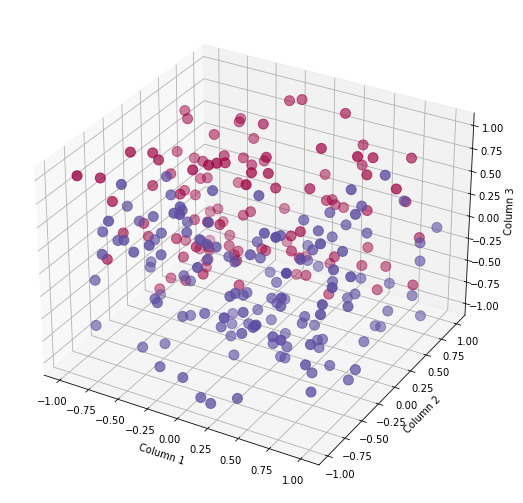

In [4]:
fig = plt.figure(figsize = (10,9))
ax = fig.add_subplot(projection='3d')

ax.scatter(Column_1, Column_2, Column_3, c=y, marker='o', s=100, cmap="Spectral")

ax.set_xlabel('Column 1')
ax.set_ylabel('Column 2')
ax.set_zlabel('Column 3')

plt.show()

In [5]:
X=df1[['Col1', 'Col2', 'Col3']].to_numpy()
y=df1[['Class']].to_numpy()

In [6]:
class Perceptron(object):
    def __init__(self, input_dim):
        self.weights = np.random.normal(loc=0.0, scale=1.0, size=input_dim)
        self.bias = np.random.normal(loc=0.0, scale=1.0, size=1)
    
    def activation(self, pred):
        return np.where(pred >= 0, 1, 0)
    
    def predict(self, data):
        return self.activation(np.dot(data, self.weights.T))
    
    def train(self, input_data, targets, epochs, lr=0.01):
        losses = []
        for e in range(1, epochs + 1):
            epoch_loss = 0
            for data, target in zip(input_data, targets):
                pred = self.predict(data)
                error = target - pred
                update = lr * error
                epoch_loss += error ** 2
                self.weights += update * data
                self.bias += update
            losses.append(epoch_loss)
            
            print(f"\rEpoch {e}/{epochs}, Loss : {epoch_loss}", end="")
            sys.stdout.flush()
            
        return losses

In [7]:
p = Perceptron(input_dim=3)
losses = p.train(X,y, epochs=15)

Epoch 15/15, Loss : [29]

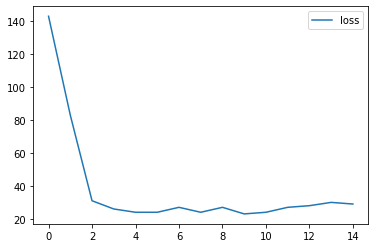

In [8]:
plt.plot(losses, label="loss")
plt.legend()
plt.show()

In [9]:
w1 = p.weights[0]
w2 = p.weights[1]
w3 = p.weights[2]
b = p.bias

In [10]:
a,b,c,d = w1,w2,w3,b

In [11]:
x_min = Column_1.min()
x_max = Column_1.max()

x = np.linspace(x_min, x_max, 100)

y_min = Column_2.min()
y_max = Column_2.max()

y = np.linspace(y_min, y_max, 100)

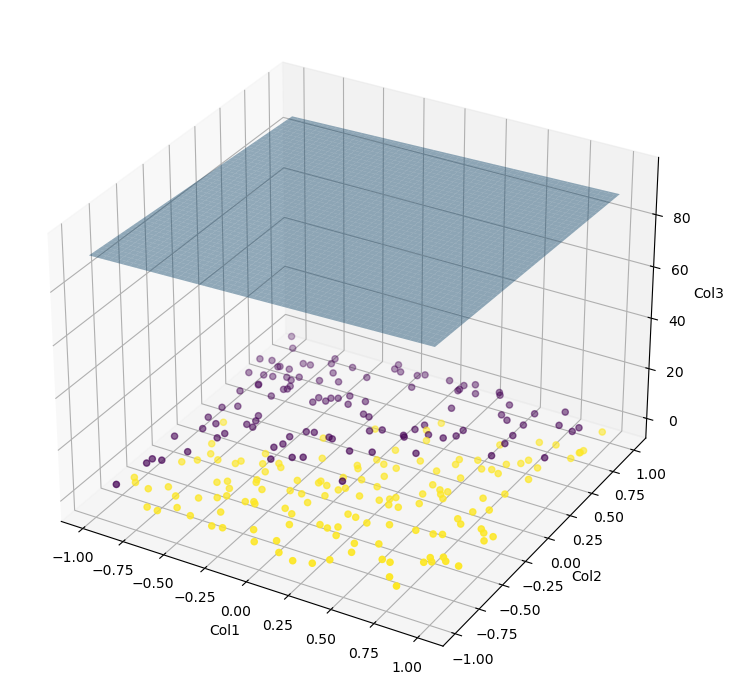

In [27]:
Xs,Ys = np.meshgrid(x,y)
Zs = (-d-a*Xs-b*Ys)/c
#visualize 3d scatterplot with hyperplane
fig = plt.figure(num=None, figsize=(9, 9), dpi=100, facecolor='w', edgecolor='k')
ax2 = fig.add_subplot(111, projection='3d')

ax2.plot_surface(Xs, Ys, Zs, alpha=0.45)

ax2.scatter(df1[['Col1']], df1[['Col2']], df1[['Col3']], c=df1[['Class']])

ax2.set_xlabel('Col1')
ax2.set_ylabel('Col2')
ax2.set_zlabel('Col3')
plt.show()

In [24]:
Zs

array([[91.80219126, 91.83060321, 91.85901517, ..., 94.55815095,
        94.58656291, 94.61497486],
       [91.75122986, 91.77964181, 91.80805377, ..., 94.50718955,
        94.53560151, 94.56401346],
       [91.70026846, 91.72868041, 91.75709237, ..., 94.45622815,
        94.48464011, 94.51305206],
       ...,
       [86.85893544, 86.8873474 , 86.91575935, ..., 89.61489513,
        89.64330709, 89.67171905],
       [86.80797404, 86.836386  , 86.86479795, ..., 89.56393373,
        89.59234569, 89.62075765],
       [86.75701264, 86.78542459, 86.81383655, ..., 89.51297233,
        89.54138429, 89.56979625]])

In [25]:
Xs

array([[-0.99      , -0.96989899, -0.94979798, ...,  0.95979798,
         0.97989899,  1.        ],
       [-0.99      , -0.96989899, -0.94979798, ...,  0.95979798,
         0.97989899,  1.        ],
       [-0.99      , -0.96989899, -0.94979798, ...,  0.95979798,
         0.97989899,  1.        ],
       ...,
       [-0.99      , -0.96989899, -0.94979798, ...,  0.95979798,
         0.97989899,  1.        ],
       [-0.99      , -0.96989899, -0.94979798, ...,  0.95979798,
         0.97989899,  1.        ],
       [-0.99      , -0.96989899, -0.94979798, ...,  0.95979798,
         0.97989899,  1.        ]])

In [26]:
Ys

array([[-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
       [-0.96, -0.96, -0.96, ..., -0.96, -0.96, -0.96],
       [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
       ...,
       [ 0.96,  0.96,  0.96, ...,  0.96,  0.96,  0.96],
       [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
       [ 1.  ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ]])